# 卷积神经网络

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch07.simple_convnet import SimpleConvNet
from common.trainer import Trainer

In [2]:

# 读入数据
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 处理花费时间较长的情况下减少数据 
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

In [3]:

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()


train loss:2.299694629172632
=== epoch:1, train acc:0.259, test acc:0.235 ===
train loss:2.2959637693959234
train loss:2.292323182428879
train loss:2.2918478895016383
train loss:2.277036860423552
train loss:2.2691220012502087
train loss:2.2590341195120094
train loss:2.232058300413074
train loss:2.2071230242934146
train loss:2.2016338509378914
train loss:2.179895501602831
train loss:2.144079112987061
train loss:2.0735651694115287
train loss:1.980457517131853
train loss:1.9597230084516084
train loss:1.9566905479802992
train loss:1.8092160956165464
train loss:1.743892530563506
train loss:1.7511985230745668
train loss:1.6059614094203858
train loss:1.5462539065559022
train loss:1.3875403354786553
train loss:1.4004058660784826
train loss:1.293811024163688
train loss:1.0898995762566586
train loss:1.1006039756361936
train loss:1.0023730154579658
train loss:1.086913094347691
train loss:0.9775810772033627
train loss:0.9753398199838899
train loss:0.8875120007287457
train loss:0.8549067006431467
t

In [4]:

# 保存参数
network.save_params("params_my.pkl")
print("Saved Network Parameters!")


Saved Network Parameters!


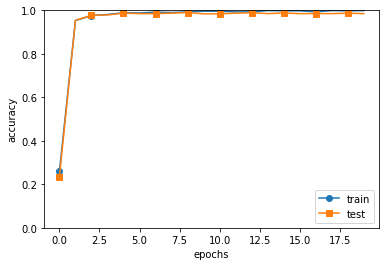

In [5]:

# 绘制图形
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


### apply filter

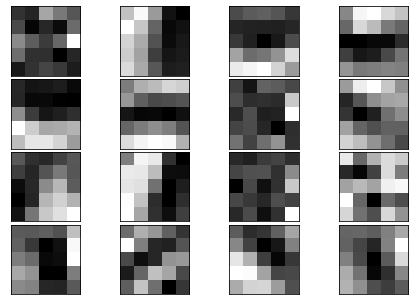

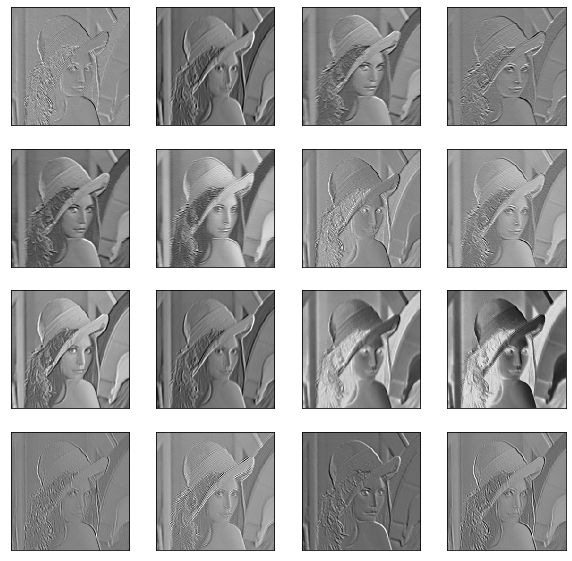

In [12]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from ch07.simple_convnet import SimpleConvNet
from matplotlib.image import imread
from common.layers import Convolution

def filter_show(filters, nx=4, show_num=16):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(show_num / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(show_num):
        ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')


network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

# 学习后的权重
network.load_params("ch07/params.pkl")

filter_show(network.params['W1'], 16)

img = imread('dataset/lena_gray.png')
img = img.reshape(1, 1, *img.shape)

fig = plt.figure(figsize=(10, 10))

w_idx = 1

for i in range(16):
    w = network.params['W1'][i]
    b = 0  # network.params['b1'][i]

    w = w.reshape(1, *w.shape)
    #b = b.reshape(1, *b.shape)
    conv_layer = Convolution(w, b) 
    out = conv_layer.forward(img)
    out = out.reshape(out.shape[2], out.shape[3])
    
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    ax.imshow(out, cmap=plt.cm.gray_r, interpolation='nearest')

plt.show()

### visualize filter

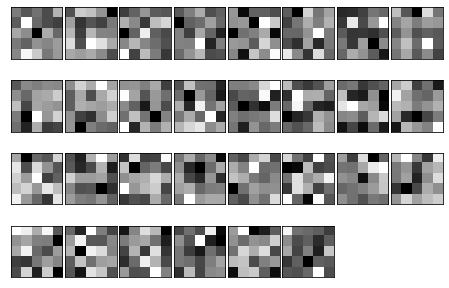

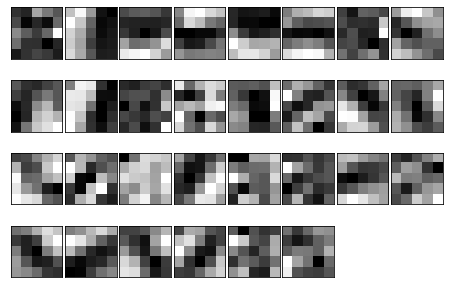

In [13]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from ch07.simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# 随机进行初始化后的权重
filter_show(network.params['W1'])

# 学习后的权重
network.load_params("ch07/params.pkl")
filter_show(network.params['W1'])

### gradient check

In [15]:
# coding: utf-8
import numpy as np
from ch07.simple_convnet import SimpleConvNet

network = SimpleConvNet(input_dim=(1,10, 10), 
                        conv_param = {'filter_num':10, 'filter_size':3, 'pad':0, 'stride':1},
                        hidden_size=10, output_size=10, weight_init_std=0.01)

X = np.random.rand(100).reshape((1, 1, 10, 10))
T = np.array([1]).reshape((1,1))

grad_num = network.numerical_gradient(X, T)
grad = network.gradient(X, T)

for key, val in grad_num.items():
    print(key, np.abs(grad_num[key] - grad[key]).mean())

W1 1.3286982761381597e-06
b1 5.078925119982199e-06
W2 2.7089189188745843e-11
b2 0.00040096474950955416
W3 1.030544108313403e-10
b3 1.7989640062748834e-07
